In [41]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

from ui import log_path

In [42]:
df = pd.read_csv(
    log_path, sep='\t'
)

In [43]:
fancy_name = {
    'audio_length_s': 'Audio Length (s)',
    'asr_token_count': 'ASR Token Count',
    'llm_input_token_count': 'LLM Input Token Count',
    'llm_output_token_count': 'LLM Output Token Count'
}

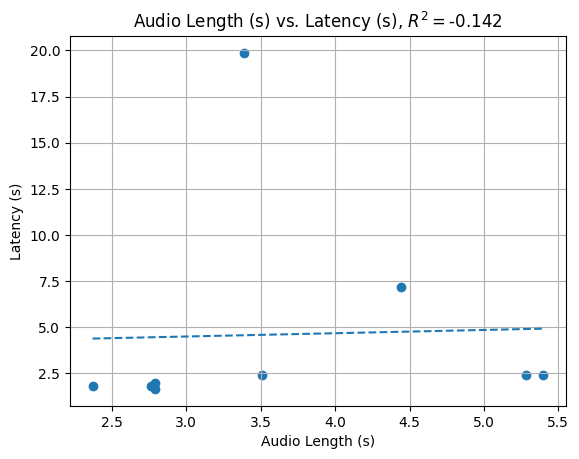

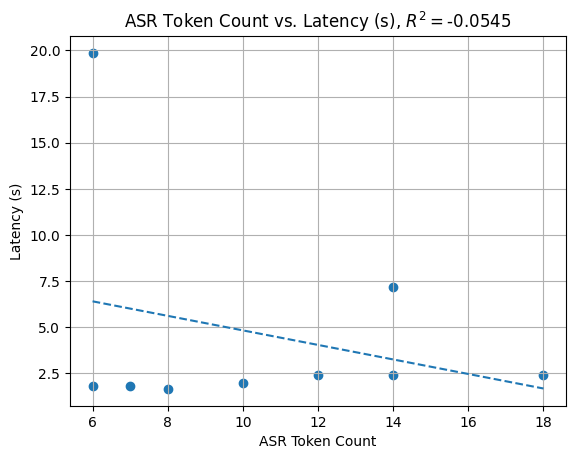

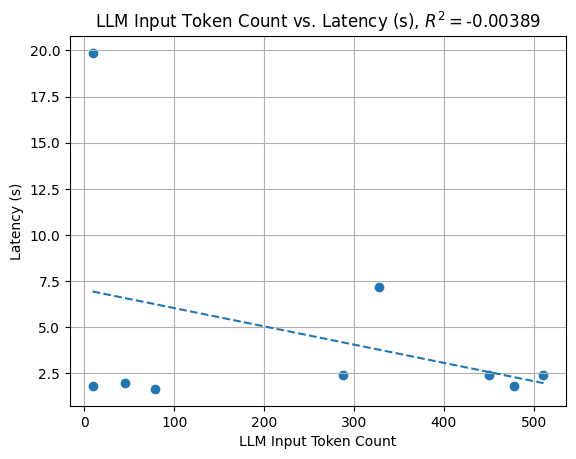

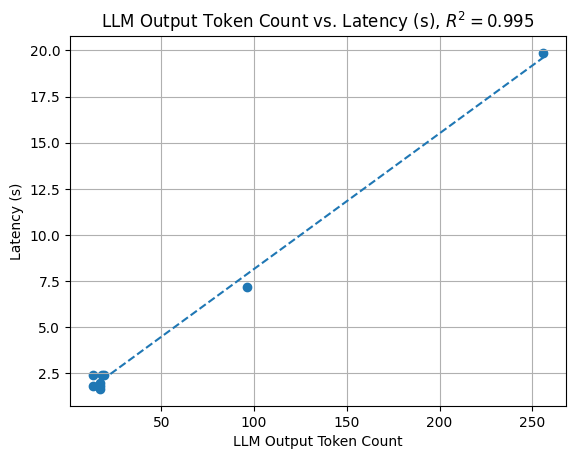

In [44]:
for col in df.columns:
    if col == 'latency_s':
        continue
    plt.figure()
    plt.scatter(df[col], df['latency_s'])
    plt.grid()
    plt.xlabel(fancy_name[col])
    plt.ylabel('Latency (s)')
    results = smf.ols(
        f'latency_s ~ {col}',
        data = df
    ).fit()
    plt.title(f'{fancy_name[col]} vs. Latency (s), $R^2=${results.rsquared_adj.item():.3}')

    b = results.params['Intercept'].item()
    m = results.params[col].item()
    x = np.linspace(min(df[col]), max(df[col]), 100)
    y = m * x + b

    plt.plot(x, y, linestyle='--')
    plt.savefig(f'figs/{col}_linear.pdf', dpi=300, bbox_inches='tight')